In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

- Initial Parameters and Conditions

In [19]:
# Time step and number of steps
dt = 0.1  
Nsteps = 100  

# Initial conditions 
x_v = np.array([-5, 5, -5, 5], dtype=float)  # x-positions of the 4 vortices
y_v = np.array([-5, -5, 5, 5], dtype=float)  # y-positions of the 4 vortices
k_v = np.array([-1, -1, 1, 1], dtype=float)  # Circulations, poistive values for counter clockwise rotation and negative for clockwise rotation

ngrid = 20  # Dimension of the simulation grid
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j]  # Grid for plotting

- Defining functions to update the flows

In [20]:
# Function to calculate velocity due to a single vortex at all grid points
def vortex_velocity(x_vortex, y_vortex, k_vortex, X, Y):
    r2 = (X - x_vortex)**2 + (Y - y_vortex)**2
    vel_x = -k_vortex * (Y - y_vortex) / r2
    vel_y = k_vortex * (X - x_vortex) / r2
    return vel_x, vel_y

# Function to update positions
def update_positions(x_v, y_v, vel_x, vel_y, dt):
    x_v += vel_x * dt
    y_v += vel_y * dt
    return x_v, y_v

In [21]:
for step in range(Nsteps): # create empty arrays to store all the velocities
    vel_x_total = np.zeros_like(x_v)
    vel_y_total = np.zeros_like(y_v)

    # Compute the advection velocity on each vortex
    for j in range(len(x_v)):
        for i in range(len(x_v)):
            if i != j:
                vel_x, vel_y = vortex_velocity(x_v[j], y_v[j], k_v[j], x_v[i], y_v[i])
                # Store all the values of the computed velocities
                vel_x_total[i] += vel_x 
                vel_y_total[i] += vel_y

    # Update the positions of the vortices
    x_v, y_v = update_positions(x_v, y_v, vel_x_total, vel_y_total, dt)

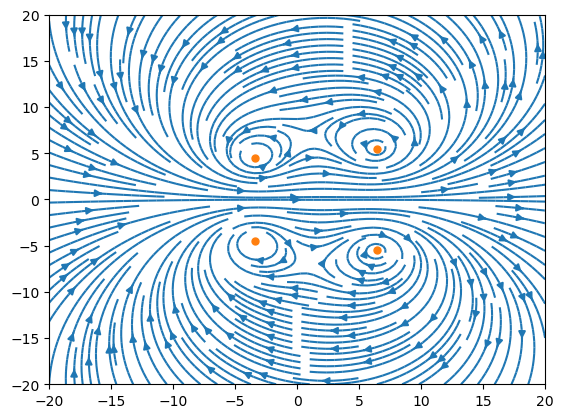

In [26]:
# Setup the plot
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])

# Compute the final positions
vel_x = np.zeros_like(X)
vel_y = np.zeros_like(Y)
for i in range(len(x_v)):
    vx, vy = vortex_velocity(x_v[i], y_v[i], k_v[i], X, Y)
    vel_x += vx
    vel_y += vy

# Plot the streamlines
ax.streamplot(X, Y, vel_x, vel_y, density=2)

# Mark the final positions of vortices
ax.plot(x_v, y_v,'.', markersize=10)

plt.show()